<a href="https://colab.research.google.com/github/Amiya-Kalita/Machine-Learning/blob/main/5_Isolation_Forest_algorithmn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Isolation Forest :
Before diving into the code, let's clarify a key point: Isolation Forest is not a clustering algorithm. It's an unsupervised anomaly detection (outlier detection) method introduced by Fei Tony Liu et al. in 2008. It works by isolating anomalies rather than identifying clusters. The core idea is that anomalies are "few and different," so they require fewer splits (or "cuts") in a collection of isolation trees to be separated from normal data

## Working :

1.   Builds an ensemble (forest) of isolation trees (similar to random forests, but for isolation, not prediction).
2. Each tree is built by randomly selecting a feature and a split value between the feature's min and max.
3. The path length from root to leaf in a tree measures how "isolated" a point is: shorter paths indicate anomalies.
4. Anomalies are scored based on the average path length across all trees. Points with shorter average paths are flagged as anomalies.





## 1. Generating Testing Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
x_normal , _ = make_blobs(n_samples=400, centers=3 , cluster_std=1.0 , random_state=42)
np.random.seed(42)
outliers = np.random.uniform(low=-10 , high=10 , size=(20,2))

x = np.vstack([x_normal,outliers])
labels = np.array([0] * len(x_normal) + [1] * len(outliers))

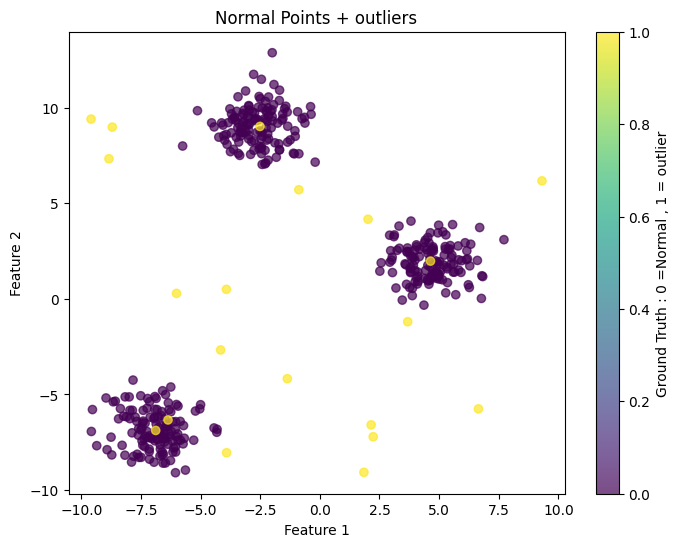

In [4]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(x[:,0], x[:,1] , c=labels , cmap='viridis' , alpha=0.7)
plt.colorbar(scatter , label ="Ground Truth : 0 =Normal , 1 = outlier")
plt.title('Normal Points + outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 2. Apply Isolation Forest for Anomaly Detection

In [5]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(random_state=42)
model.fit(x)

IsolationForest(random_state=42)

In [6]:
predictions = model.predict(x)
anomaly_scores = model.decision_function(x)
num_anomalies = np.sum(predictions == -1)

print(f"Number of detected anomalies: {num_anomalies} (out of {len(x)} points)")
print(f"Anomaly fraction: {num_anomalies / len(x):.2%}")

accuracy = np.mean(predictions == (1 - 2 * labels))
print(f"Accuracy vs. ground truth: {accuracy:.2%}")

Number of detected anomalies: 79 (out of 420 points)
Anomaly fraction: 18.81%
Accuracy vs. ground truth: 84.05%


### 3. Visualize the Results

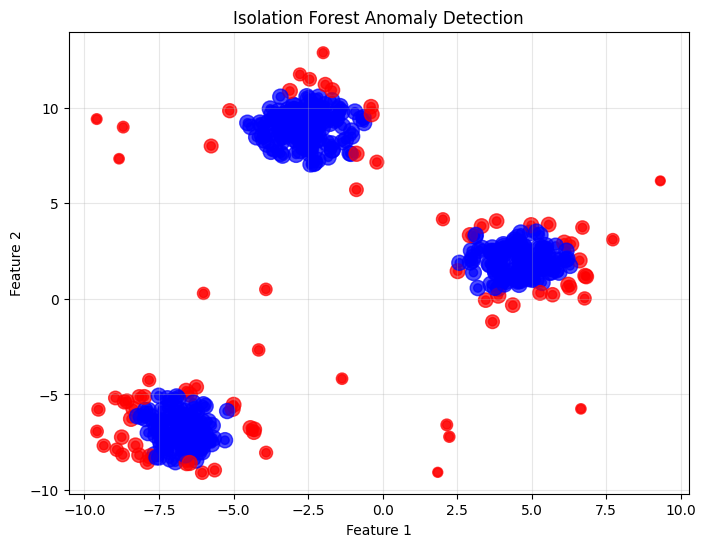

In [7]:
# Visualize predictions
plt.figure(figsize=(8, 6))
colors = ['blue' if pred == 1 else 'red' for pred in predictions]
plt.scatter(x[:, 0], x[:, 1], c=colors, alpha=0.7)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

sizes = 50 + 100 * (anomaly_scores - anomaly_scores.min()) / (anomaly_scores.max() - anomaly_scores.min())
plt.scatter(x[:, 0], x[:, 1], c=colors, s=sizes, alpha=0.7)
plt.show()

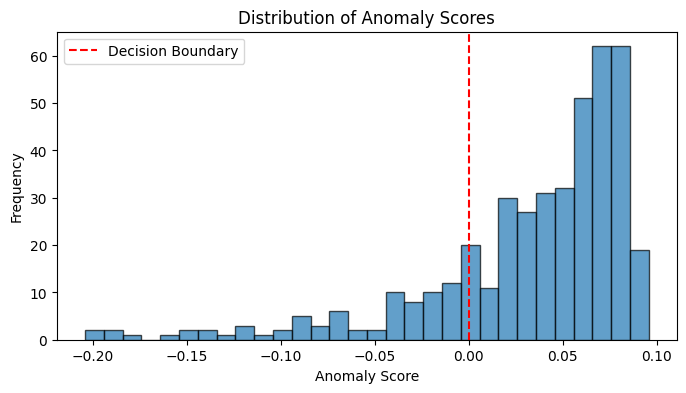

In [8]:
plt.figure(figsize=(8, 4))
plt.hist(anomaly_scores, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.show()

### 4. All Important Parameters

In [9]:
# Define parameter grid for experimentation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 'auto'],
    'contamination': [0.05, 'auto'],
    'max_features': [0.8, 1.0],
    'bootstrap': [False, True],
    'n_jobs': [-1]
}

results = []
for params in [{k: v for k, v in param_grid.items()}]:
    model_tuned = IsolationForest(
        n_estimators=200,      # More trees for accuracy
        max_samples=0.5,       # Half samples per tree (faster)
        contamination=0.05,    # Expect 5% anomalies
        max_features=0.8,      # 80% features per split
        bootstrap=True,        # Bootstrap for diversity
        n_jobs=-1,             # Parallel
        random_state=42,       # Reproducible
        verbose=1              # Show progress
    )
    model_tuned.fit(x)
    preds = model_tuned.predict(x)
    num_anoms = np.sum(preds == -1)
    results.append({
        'params': params,  # In full grid, this would vary
        'num_anomalies': num_anoms,
        'anomaly_fraction': num_anoms / len(x)
    })
    print(f"Params: n_estimators={model_tuned.n_estimators}, contamination={model_tuned.contamination}")
    print(f"Detected anomalies: {num_anoms}")

predictions_tuned = model_tuned.predict(x)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Params: n_estimators=200, contamination=0.05
Detected anomalies: 21


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


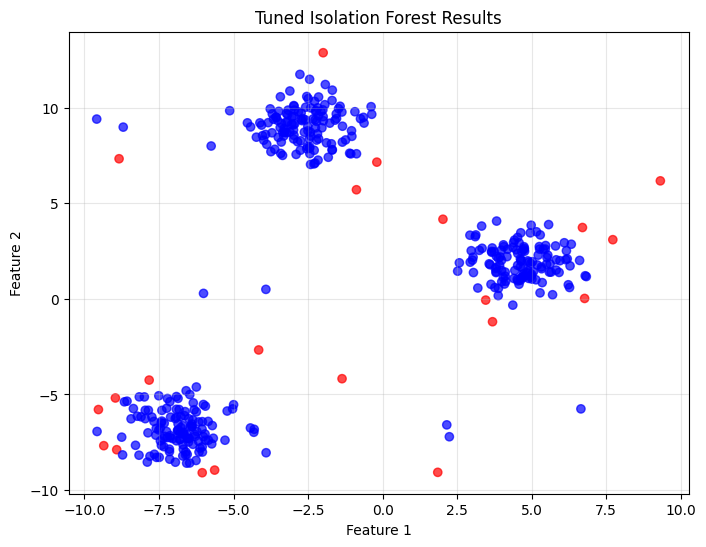

In [10]:
plt.figure(figsize=(8, 6))
colors_tuned = ['blue' if pred == 1 else 'red' for pred in predictions_tuned]
plt.scatter(x[:, 0], x[:, 1], c=colors_tuned, alpha=0.7)
plt.title('Tuned Isolation Forest Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()